In [110]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [111]:
img = cv2.imread(r"/workspaces/codespaces-jupyter-test/data/test.jpeg")

In [112]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale detector = dlib.get_frontal_face_detector()
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

In [113]:

def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords
predictor = dlib.shape_predictor(r'/workspaces/codespaces-jupyter-test/data/s87lFHO2TGkXgCR')
for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)
    #for (x, y) in shape:
        #cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

In [114]:
def eye_on_mask(mask, side):
    points = [shape[i] for i in side]
    points = np.array(points, dtype=np.int32)
    mask = cv2.fillConvexPoly(mask, points, 255)
    return mask
left = [36, 37, 38, 39, 40, 41] # keypoint indices for left eye
right = [42, 43, 44, 45, 46, 47] # keypoint indices for right eye
mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask = eye_on_mask(mask, left)
mask = eye_on_mask(mask, right)



In [115]:
kernel = np.ones((9, 9), np.uint8)
mask = cv2.dilate(mask, kernel, 5)
eyes = cv2.bitwise_and(img, img, mask=mask)
mask = (eyes == [0, 0, 0]).all(axis=2)
eyes[mask] = [255, 255, 255]
eyes_gray = cv2.cvtColor(eyes, cv2.COLOR_BGR2GRAY)

In [116]:
threshold = 50
_, thresh = cv2.threshold(eyes_gray, threshold, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
thresh = cv2.medianBlur(thresh, 3)

In [117]:
def contouring(thresh, mid, img, right=False):
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    try:
        cnt = max(cnts, key = cv2.contourArea)
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        if right:
            cx += mid
        cv2.circle(img, (cx, cy), 4, (0, 0, 255), 2)
    except:
        pass
mid = (shape[39][0] + shape[42][0]) // 2
contouring(thresh[:, 0:mid], mid, img)
contouring(thresh[:, mid:], mid, img, True)

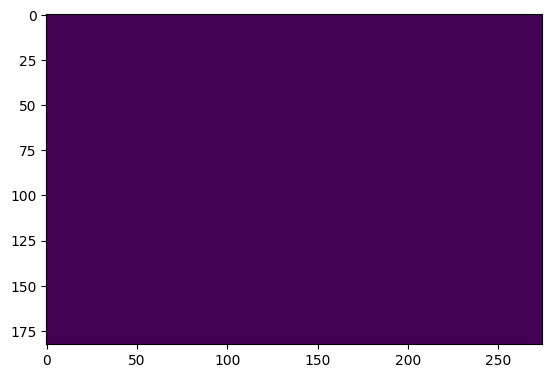

In [120]:
plt.imshow(thresh)
plt.show()

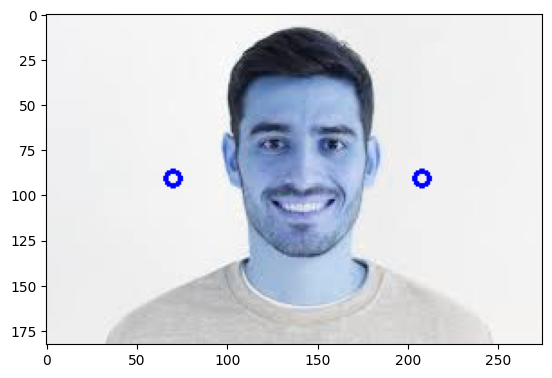

In [119]:
plt.imshow(img)
plt.show()